### importing libraries and dataset

In [4]:
pip install pandas


     ---------------------------------------- 10.4/10.4 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

In [6]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 5.0 MB/s eta 0:00:00
  Using cached Pillow-9.3.0-cp310-cp310-win_amd64.whl (2.5 MB)
     ---------------------------------------- 98.3/98.3 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install seaborn

     -------------------------------------- 288.2/288.2 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv("uber-raw-data-sep14.csv")

In [11]:
data

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [13]:
data["Date/Time"]= data["Date/Time"].map(pd.to_datetime)


In [14]:
data

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764


### preparing data

In [26]:
data["day"]= data["Date/Time"].apply(lambda x: x.day)
data["weekdays"]= data["Date/Time"].apply(lambda x: x.weekday())
data["hour"]= data["Date/Time"].apply(lambda x: x.hour)

In [27]:
data

,Date/Time,Lat,Lon,Base,day,weekdays,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22


### day-wise & hour-wise analysis

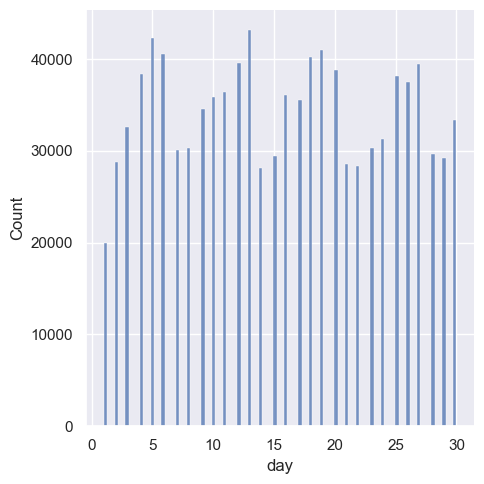

In [37]:
sns.set(rc={'figure.figsize':(15,13)})
sns.displot(data["day"])

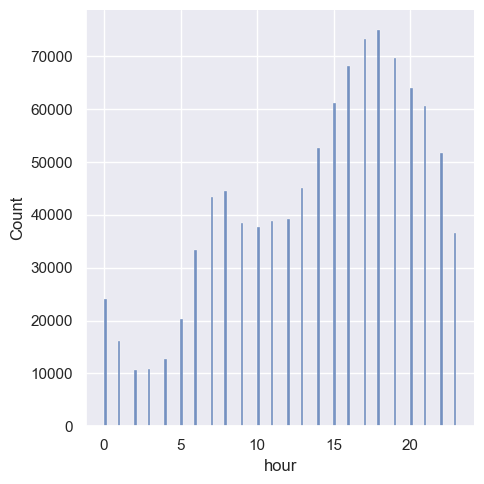

In [38]:
sns.displot(data["hour"])

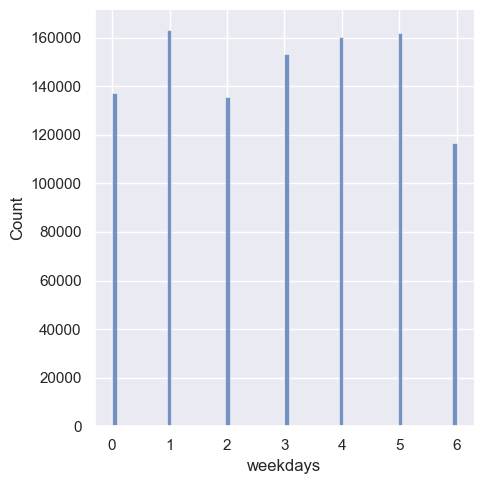

In [39]:
sns.displot(data["weekdays"])

<AxesSubplot: xlabel='hour', ylabel='weekdays'>

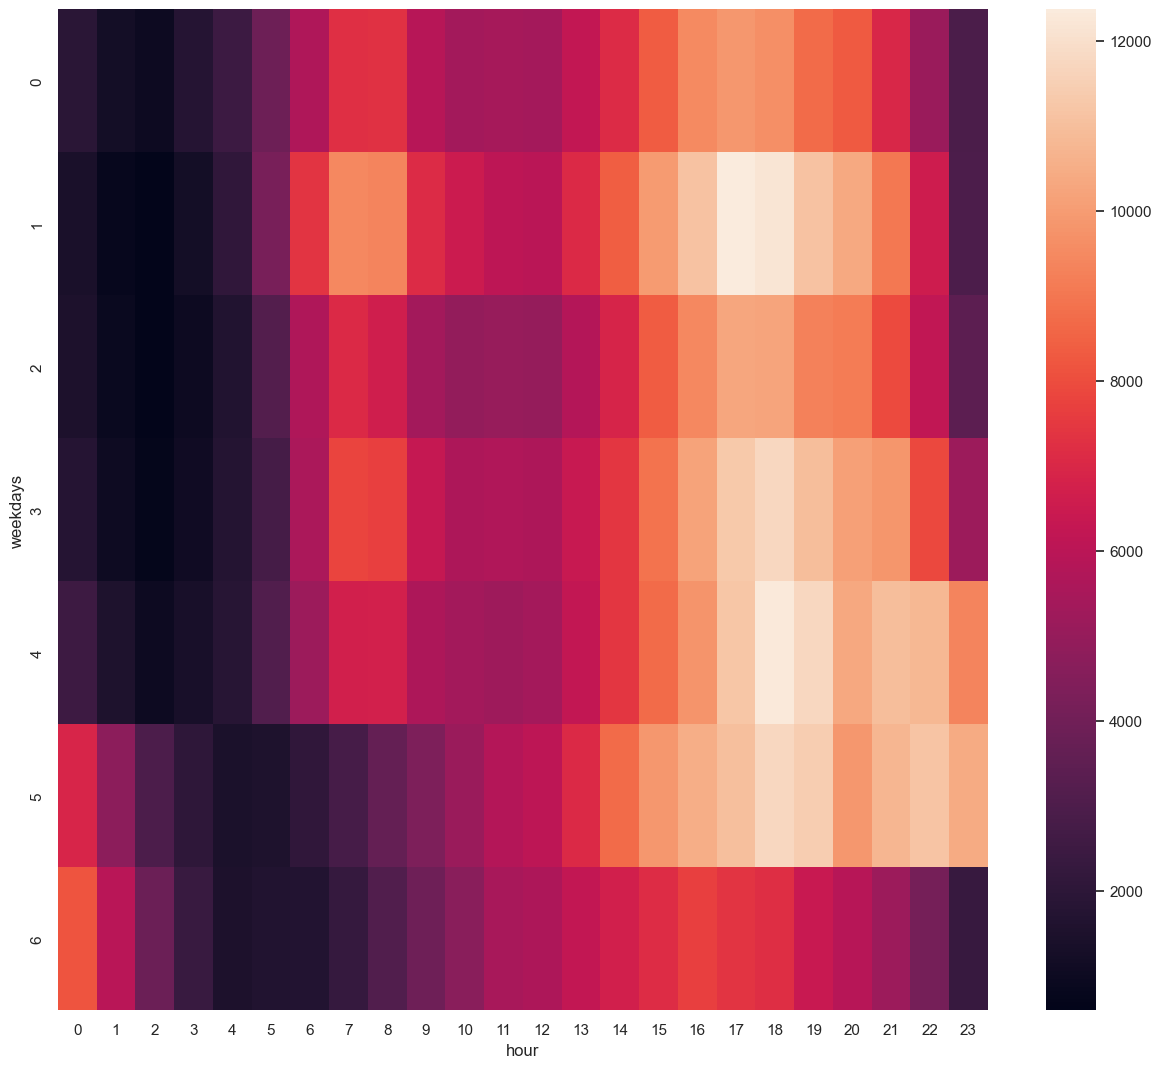

In [44]:
df= data.groupby(["weekdays", "hour"]).apply(lambda x: len(x))
df= df.unstack()
sns.heatmap(df,annot=False)


### plot density according to the regions of NYC

<AxesSubplot: xlabel='Lon', ylabel='Lat'>

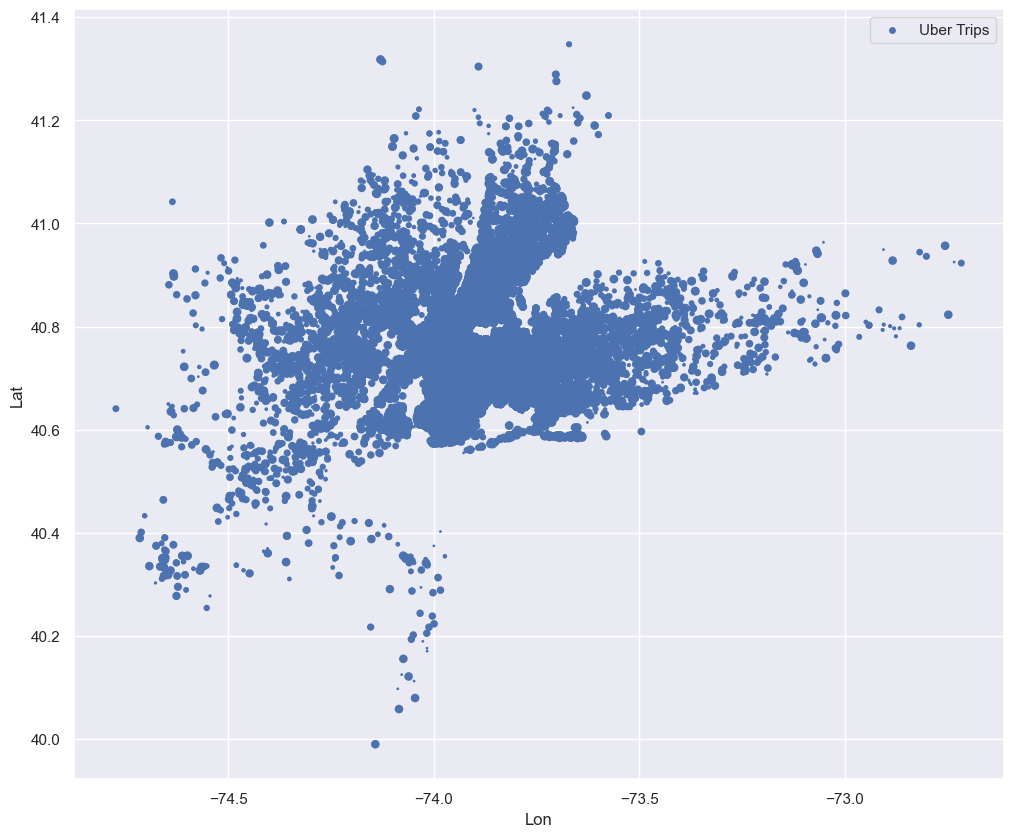

In [45]:
data.plot(kind='scatter', x="Lon", y="Lat", s=data['day'], label='Uber Trips', figsize=(12, 10))